<a href="https://colab.research.google.com/github/KIRTIRAJ4327/30days-AI-challenge/blob/main/Day22_Personal_Finance_Advisor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Core Concept: Decision Systems and Recommendation Engines**


*   Analyze financial data

*   Make personalized recommendations based on that data
*   Apply decision-making algorithms to financial planning










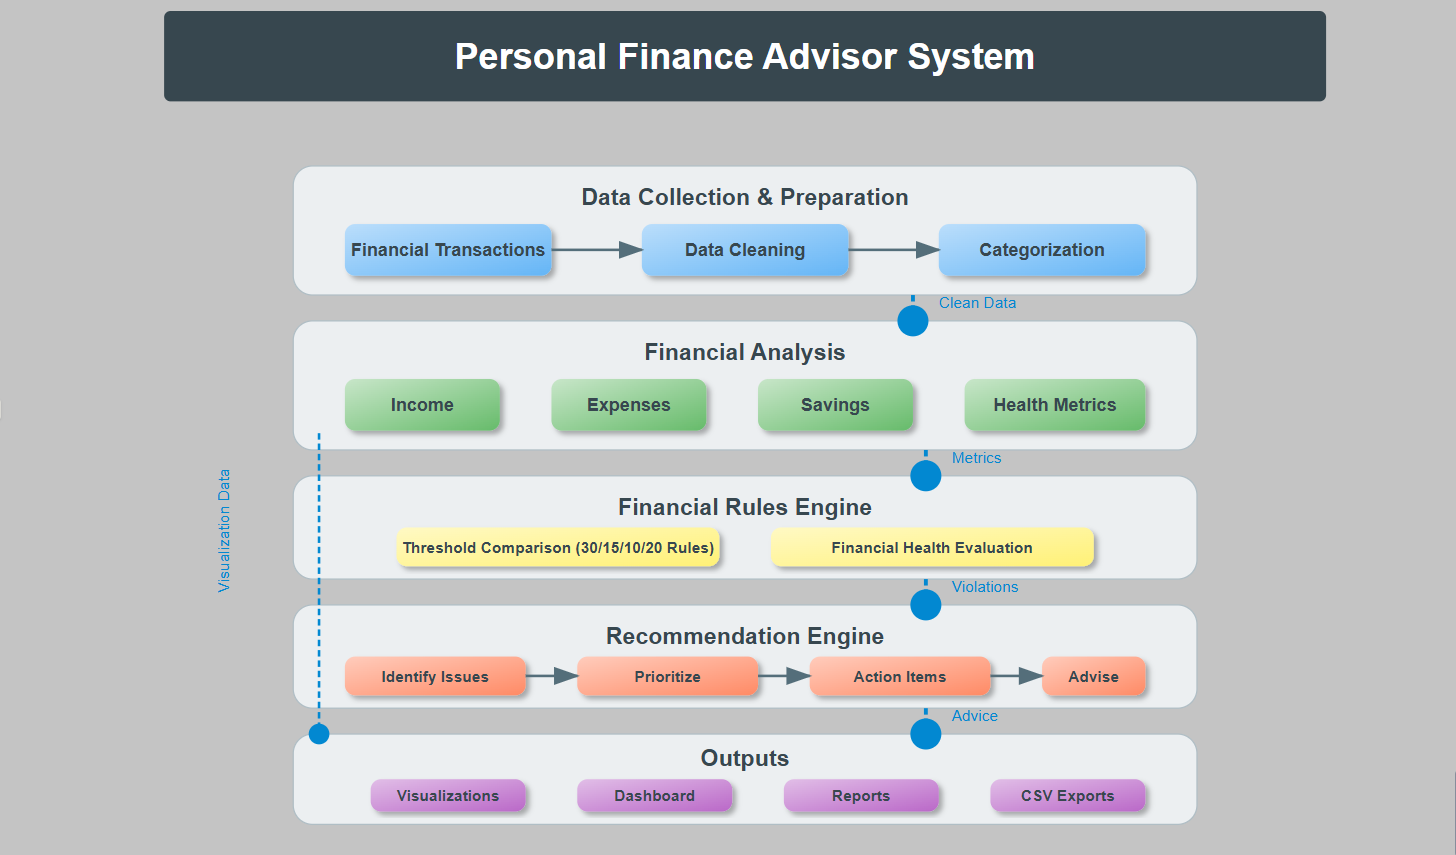

**Setting Up Your Environment**

In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# For visualization
plt.style.use('ggplot')
print("Environment set up successfully!")

Environment set up successfully!


**Creating Sample Financial Data**

In [7]:
# Create a sample financial dataset
# This mimics 3 months of financial transactions

# Set a random seed for reproducibility
np.random.seed(42)

# Generate dates for a 3-month period
dates = pd.date_range(start='2025-01-01', end='2025-03-31', freq='D')

# Create transaction categories
categories = ['Groceries', 'Dining', 'Rent', 'Utilities', 'Entertainment',
              'Transportation', 'Shopping', 'Healthcare', 'Subscription',
              'Income', 'Savings', 'Investment']

# Generate random transactions
transactions = []

for date in dates:
    # Income occurs twice a month
    if date.day == 1 or date.day == 15:
        transactions.append({
            'date': date,
            'category': 'Income',
            'amount': np.random.normal(3000, 200),  # Income around $3000
            'description': 'Salary'
        })

    # Rent once a month
    if date.day == 1:
        transactions.append({
            'date': date,
            'category': 'Rent',
            'amount': -1200,  # Negative because it's an expense
            'description': 'Monthly rent'
        })

    # Generate random daily transactions
    num_transactions = np.random.randint(0, 5)  # 0 to 4 transactions per day

    for _ in range(num_transactions):
        category = np.random.choice([cat for cat in categories if cat not in ['Income', 'Rent']])

        # Determine amount based on category
        if category == 'Groceries':
            amount = -np.random.normal(60, 20)
        elif category == 'Dining':
            amount = -np.random.normal(40, 15)
        elif category == 'Utilities':
            amount = -np.random.normal(100, 30)
        elif category == 'Entertainment':
            amount = -np.random.normal(35, 15)
        elif category == 'Transportation':
            amount = -np.random.normal(25, 10)
        elif category == 'Shopping':
            amount = -np.random.normal(75, 40)
        elif category == 'Healthcare':
            amount = -np.random.normal(80, 50)
        elif category == 'Subscription':
            amount = -np.random.normal(15, 5)
        elif category == 'Savings':
            amount = -np.random.normal(200, 50)  # Money moved to savings
        elif category == 'Investment':
            amount = -np.random.normal(150, 75)  # Investment contributions

        transactions.append({
            'date': date,
            'category': category,
            'amount': amount,
            'description': f'{category} expense'
        })

# Create DataFrame
finance_df = pd.DataFrame(transactions)

# Sort by date
finance_df = finance_df.sort_values('date')

# Round amounts to 2 decimal places
finance_df['amount'] = finance_df['amount'].round(2)

# Display the first few transactions
print(f"Created {len(finance_df)} financial transactions")
finance_df.head()

Created 196 financial transactions


,date,category,amount,description
0,2025-01-01,Income,3099.34,Salary
1,2025-01-01,Rent,-1200.00,Monthly rent
2,2025-01-01,Subscription,-14.31,Subscription expense
3,2025-01-01,Transportation,-22.66,Transportation expense
4,2025-01-02,Subscription,-13.83,Subscription expense


**Data Analysis and Financial Metrics**

In [8]:
# Basic financial analysis
def analyze_finances(df):
    # Make a copy to avoid modifying original
    analysis_df = df.copy()

    # Calculate total income and expenses
    total_income = analysis_df[analysis_df['amount'] > 0]['amount'].sum()
    total_expenses = abs(analysis_df[analysis_df['amount'] < 0]['amount'].sum())

    # Calculate net cash flow
    net_cash_flow = total_income - total_expenses

    # Calculate savings rate
    savings_amount = abs(analysis_df[analysis_df['category'] == 'Savings']['amount'].sum())
    investment_amount = abs(analysis_df[analysis_df['category'] == 'Investment']['amount'].sum())
    total_savings = savings_amount + investment_amount
    savings_rate = (total_savings / total_income) * 100 if total_income > 0 else 0

    # Calculate expense breakdown by category
    expense_by_category = analysis_df[analysis_df['amount'] < 0].groupby('category')['amount'].sum().abs()

    # Calculate percentage of income for each expense category
    category_percentage = (expense_by_category / total_income * 100).round(1)

    # Check if any category exceeds recommended thresholds
    # Common financial rules of thumb
    threshold_concerns = []

    # Housing costs (rent/mortgage) should be under 30% of income
    housing_pct = category_percentage.get('Rent', 0)
    if housing_pct > 30:
        threshold_concerns.append(f"Housing costs are {housing_pct:.1f}% of income (recommended: under 30%)")

    # Food (Groceries + Dining) should be under 15% of income
    food_pct = category_percentage.get('Groceries', 0) + category_percentage.get('Dining', 0)
    if food_pct > 15:
        threshold_concerns.append(f"Food costs are {food_pct:.1f}% of income (recommended: under 15%)")

    # Entertainment should be under 10% of income
    entertainment_pct = category_percentage.get('Entertainment', 0) + category_percentage.get('Shopping', 0)
    if entertainment_pct > 10:
        threshold_concerns.append(f"Entertainment costs are {entertainment_pct:.1f}% of income (recommended: under 10%)")

    # Transportation should be under 15% of income
    transportation_pct = category_percentage.get('Transportation', 0)
    if transportation_pct > 15:
        threshold_concerns.append(f"Transportation costs are {transportation_pct:.1f}% of income (recommended: under 15%)")

    # Savings rate should be at least 20%
    if savings_rate < 20:
        threshold_concerns.append(f"Savings rate is {savings_rate:.1f}% (recommended: at least 20%)")

    return {
        'total_income': total_income,
        'total_expenses': total_expenses,
        'net_cash_flow': net_cash_flow,
        'savings_rate': savings_rate,
        'expense_by_category': expense_by_category,
        'category_percentage': category_percentage,
        'threshold_concerns': threshold_concerns
    }

# Run the analysis
financial_analysis = analyze_finances(finance_df)

# Display key metrics
print(f"Total Income: ${financial_analysis['total_income']:.2f}")
print(f"Total Expenses: ${financial_analysis['total_expenses']:.2f}")
print(f"Net Cash Flow: ${financial_analysis['net_cash_flow']:.2f}")
print(f"Savings Rate: {financial_analysis['savings_rate']:.2f}%")
print("\nExpense Breakdown (% of Income):")
for cat, pct in financial_analysis['category_percentage'].items():
    print(f"- {cat}: {pct:.1f}%")

print("\nPotential Financial Concerns:")
if financial_analysis['threshold_concerns']:
    for concern in financial_analysis['threshold_concerns']:
        print(f"- {concern}")
else:
    print("- No major concerns found in your financial profile")

Total Income: $18224.14
Total Expenses: $17618.79
Net Cash Flow: $605.35
Savings Rate: 32.09%

Expense Breakdown (% of Income):
- Dining: 3.9%
- Entertainment: 4.8%
- Groceries: 7.3%
- Healthcare: 8.9%
- Investment: 9.3%
- Rent: 19.8%
- Savings: 22.8%
- Shopping: 3.1%
- Subscription: 1.6%
- Transportation: 3.9%
- Utilities: 11.4%

Potential Financial Concerns:
- No major concerns found in your financial profile


**Visualizing Financial Data**

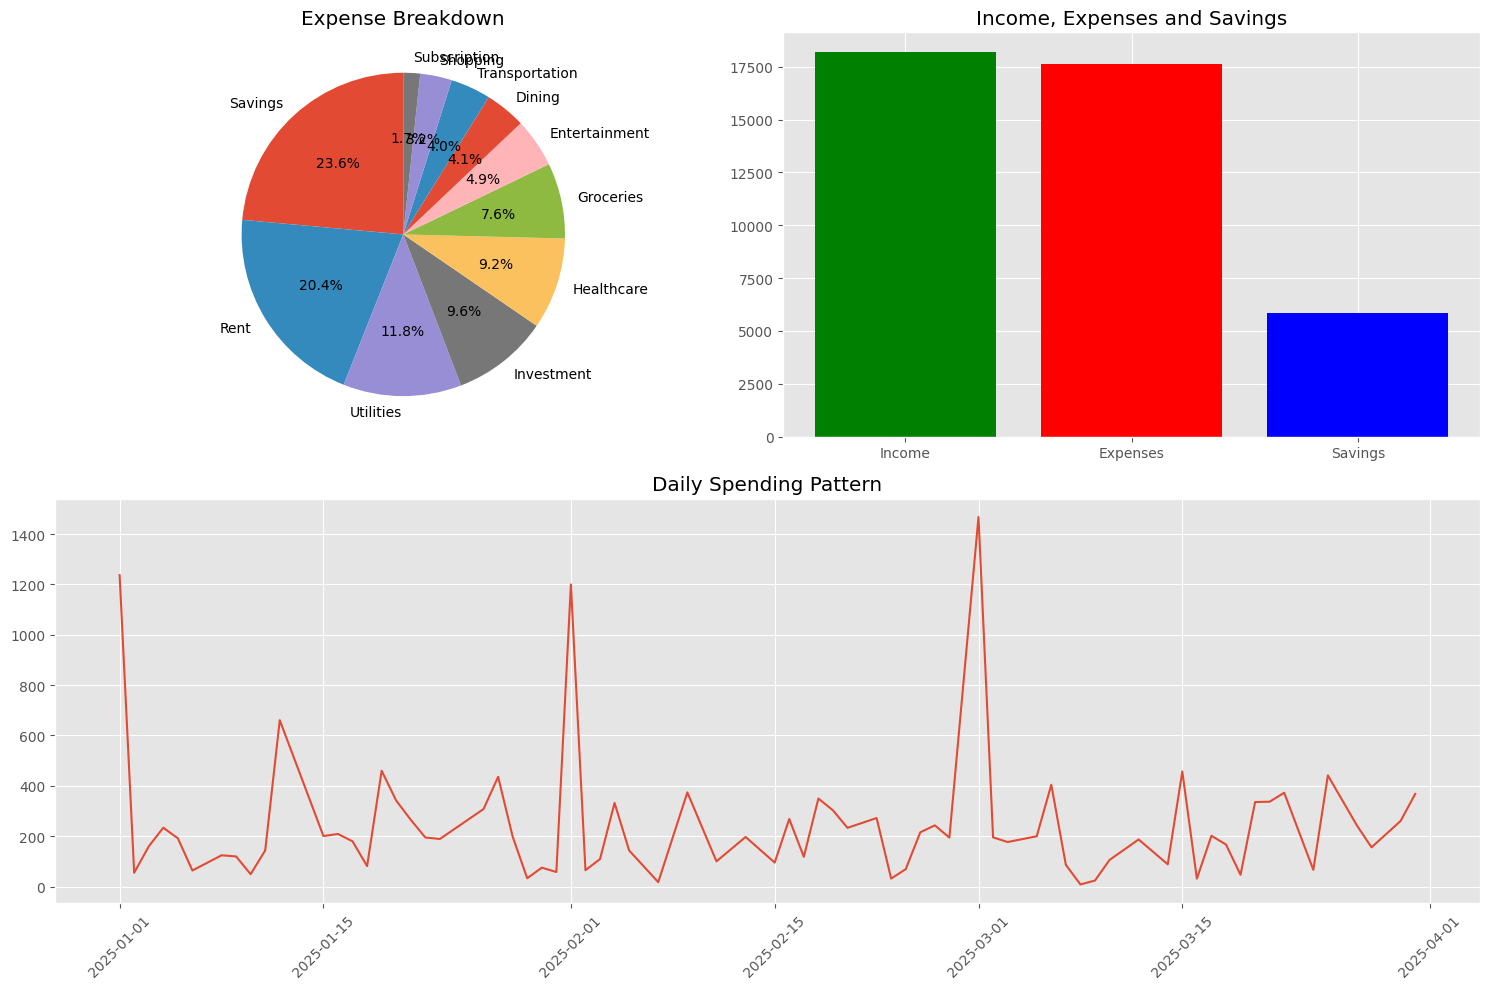

In [9]:
# Visualization of financial data
def visualize_finances(df, analysis):
    plt.figure(figsize=(15, 10))

    # 1. Expense breakdown pie chart
    plt.subplot(2, 2, 1)
    expense_data = analysis['expense_by_category']
    expense_data = expense_data.sort_values(ascending=False)
    plt.pie(expense_data, labels=expense_data.index, autopct='%1.1f%%', startangle=90)
    plt.title('Expense Breakdown')

    # 2. Income vs Expenses vs Savings bar chart
    plt.subplot(2, 2, 2)
    bars = ['Income', 'Expenses', 'Savings']
    values = [analysis['total_income'], analysis['total_expenses'],
              analysis['total_income'] * analysis['savings_rate'] / 100]
    plt.bar(bars, values, color=['green', 'red', 'blue'])
    plt.title('Income, Expenses and Savings')

    # 3. Daily spending pattern
    plt.subplot(2, 1, 2)
    daily_expenses = df[df['amount'] < 0].groupby('date')['amount'].sum().abs()
    plt.plot(daily_expenses.index, daily_expenses.values)
    plt.title('Daily Spending Pattern')
    plt.xticks(rotation=45)
    plt.tight_layout()

    return plt

# Generate visualization
finance_viz = visualize_finances(finance_df, financial_analysis)
finance_viz.show()

**Building the Recommendation Engine**

In [10]:
def generate_recommendations(analysis):
    recommendations = []

    # Recommendation 1: Savings
    if analysis['savings_rate'] < 20:
        recommendations.append({
            'category': 'Savings',
            'priority': 'High',
            'recommendation': f"Increase your savings rate from {analysis['savings_rate']:.1f}% to at least 20%",
            'explanation': "A savings rate of at least 20% is recommended to build an emergency fund and prepare for future goals.",
            'action_items': [
                "Set up automatic transfers to savings on paydays",
                "Look for 3-5 non-essential expenses you could reduce",
                "Target setting aside an emergency fund of 3-6 months of expenses"
            ]
        })

    # Recommendation 2: Housing
    housing_pct = analysis['category_percentage'].get('Rent', 0)
    if housing_pct > 30:
        recommendations.append({
            'category': 'Housing',
            'priority': 'Medium',
            'recommendation': f"Reduce housing costs from {housing_pct:.1f}% to under 30% of income",
            'explanation': "Financial experts recommend keeping housing costs under 30% of your income for better financial flexibility.",
            'action_items': [
                "Consider a roommate to split costs",
                "Evaluate if moving to a more affordable place would be beneficial",
                "Negotiate rent when your lease is up for renewal"
            ]
        })

    # Recommendation 3: Discretionary spending
    entertainment_pct = analysis['category_percentage'].get('Entertainment', 0) + analysis['category_percentage'].get('Shopping', 0)
    if entertainment_pct > 10:
        recommendations.append({
            'category': 'Discretionary Spending',
            'priority': 'Medium',
            'recommendation': f"Reduce entertainment and shopping from {entertainment_pct:.1f}% to under 10% of income",
            'explanation': "Discretionary spending over 10% of income may be limiting your ability to save and invest for the future.",
            'action_items': [
                "Create a specific 'fun money' budget and stick to it",
                "Implement a 48-hour rule before making non-essential purchases",
                "Look for free or low-cost entertainment options"
            ]
        })

    # Recommendation 4: Income
    if analysis['net_cash_flow'] < 0:
        recommendations.append({
            'category': 'Income',
            'priority': 'High',
            'recommendation': "Increase income to achieve positive cash flow",
            'explanation': "You're currently spending more than you earn, which is not sustainable long-term.",
            'action_items': [
                "Look for side gigs or freelance opportunities",
                "Consider asking for a raise or promotion",
                "Develop skills that can lead to higher-paying positions"
            ]
        })

    # Recommendation 5: Food spending
    food_pct = analysis['category_percentage'].get('Groceries', 0) + analysis['category_percentage'].get('Dining', 0)
    if food_pct > 15:
        recommendations.append({
            'category': 'Food',
            'priority': 'Medium',
            'recommendation': f"Reduce food spending from {food_pct:.1f}% to under 15% of income",
            'explanation': "Food costs over 15% of income may indicate opportunities to save without sacrificing nutrition.",
            'action_items': [
                "Meal plan and cook at home more often",
                "Limit eating out to once per week",
                "Buy groceries in bulk and shop with a list"
            ]
        })

    # Recommendation 6: Debt management
    # This would require debt data which we don't have in our sample
    # So we'll add a general recommendation
    recommendations.append({
        'category': 'Debt Strategy',
        'priority': 'Medium',
        'recommendation': "Create a debt repayment strategy",
        'explanation': "An effective debt strategy helps you save on interest and improve your financial health faster.",
        'action_items': [
            "List all debts by interest rate",
            "Focus extra payments on highest-interest debt first",
            "Consider debt consolidation for high-interest debts"
        ]
    })

    # Sort recommendations by priority
    priority_order = {'High': 0, 'Medium': 1, 'Low': 2}
    recommendations.sort(key=lambda x: priority_order[x['priority']])

    return recommendations

# Generate personalized recommendations
financial_recommendations = generate_recommendations(financial_analysis)

# Display recommendations
print("PERSONALIZED FINANCIAL RECOMMENDATIONS:\n")
for i, rec in enumerate(financial_recommendations, 1):
    print(f"Recommendation {i}: {rec['recommendation']} ({rec['priority']} Priority)")
    print(f"Why: {rec['explanation']}")
    print("Action steps:")
    for j, action in enumerate(rec['action_items'], 1):
        print(f"  {j}. {action}")
    print()

PERSONALIZED FINANCIAL RECOMMENDATIONS:

Recommendation 1: Create a debt repayment strategy (Medium Priority)
Why: An effective debt strategy helps you save on interest and improve your financial health faster.
Action steps:
  1. List all debts by interest rate
  2. Focus extra payments on highest-interest debt first
  3. Consider debt consolidation for high-interest debts



**Creating a Simple Financial Health Dashboard**


                              FINANCIAL HEALTH DASHBOARD

FINANCIAL SUMMARY:
Total Monthly Income: $6074.71
Total Monthly Expenses: $5872.93
Monthly Net Cash Flow: $201.78
Current Savings Rate: 32.1%

Financial Health Score: 100/100
Status: EXCELLENT

TOP RECOMMENDATIONS:
1. Create a debt repayment strategy (Medium Priority)


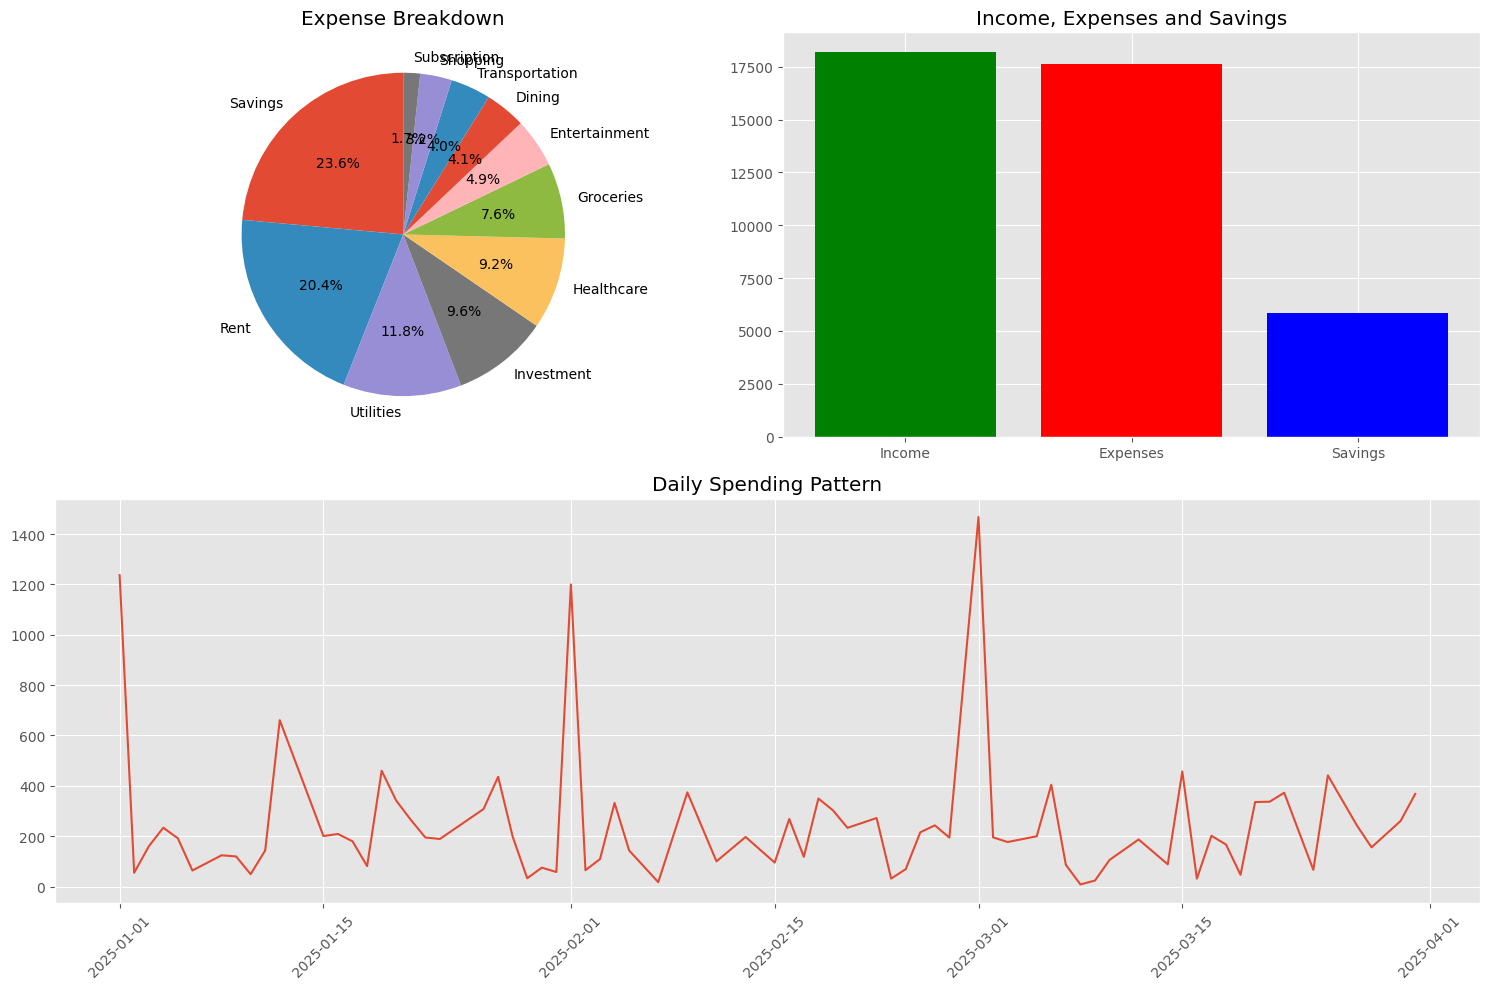

In [11]:
def financial_health_dashboard(df):
    # Run analysis
    analysis = analyze_finances(df)

    # Generate recommendations
    recommendations = generate_recommendations(analysis)

    # Print dashboard header
    print("\n" + "="*80)
    print(" "*30 + "FINANCIAL HEALTH DASHBOARD")
    print("="*80 + "\n")

    # Financial summary
    print("FINANCIAL SUMMARY:")
    print(f"Total Monthly Income: ${analysis['total_income']/3:.2f}")  # Divided by 3 for monthly average
    print(f"Total Monthly Expenses: ${analysis['total_expenses']/3:.2f}")
    print(f"Monthly Net Cash Flow: ${analysis['net_cash_flow']/3:.2f}")
    print(f"Current Savings Rate: {analysis['savings_rate']:.1f}%")

    # Financial health score (simple calculation)
    health_factors = []
    health_factors.append(1 if analysis['net_cash_flow'] > 0 else 0)  # Positive cash flow
    health_factors.append(1 if analysis['savings_rate'] >= 20 else 0)  # Adequate savings
    health_factors.append(1 if len(analysis['threshold_concerns']) <= 2 else 0)  # Few concerns

    health_score = sum(health_factors) / len(health_factors) * 100

    print(f"\nFinancial Health Score: {health_score:.0f}/100")
    if health_score >= 80:
        status = "EXCELLENT"
    elif health_score >= 60:
        status = "GOOD"
    elif health_score >= 40:
        status = "NEEDS IMPROVEMENT"
    else:
        status = "REQUIRES ATTENTION"

    print(f"Status: {status}")

    # Top recommendations
    print("\nTOP RECOMMENDATIONS:")
    for i, rec in enumerate(recommendations[:3], 1):  # Show top 3
        print(f"{i}. {rec['recommendation']} ({rec['priority']} Priority)")

    # Create visualizations
    visualize_finances(df, analysis)

    return analysis, recommendations

# Run the dashboard
analysis_results, recommendation_results = financial_health_dashboard(finance_df)